# Iris Flower Classification
* The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
* Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

path = '/content/drive/MyDrive/Harsh/Task 3/IRIS.csv'

df = pd.read_csv(path)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape


(150, 5)

In [6]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [10]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = le.fit_transform(df[i])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<ipython-input-12-9077d1aa4ab7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris, palette='coolwarm')


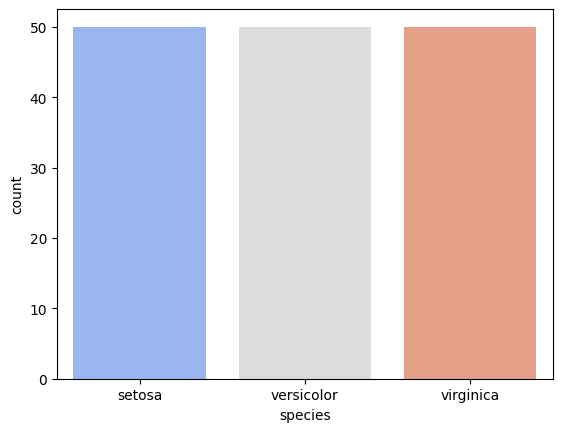

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

sns.countplot(x='species', data=iris, palette='coolwarm')

plt.show()

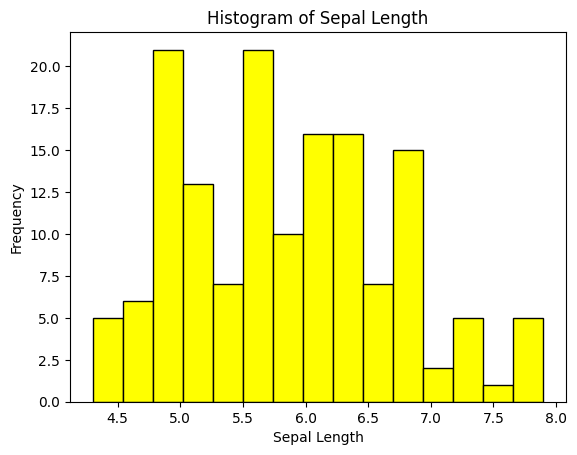

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

plt.hist(iris['sepal_length'], bins=15, color='Yellow', edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

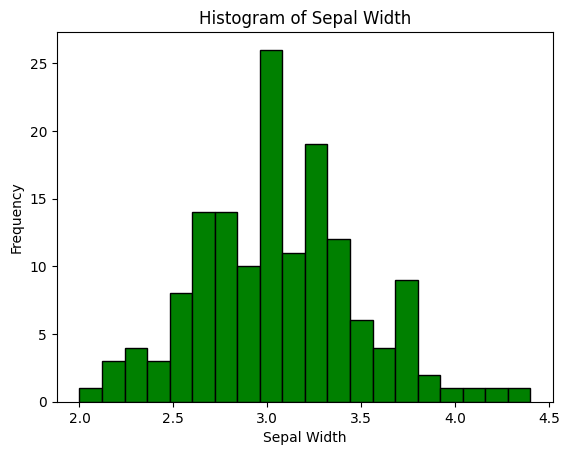

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

plt.hist(iris['sepal_width'], bins=20, color='Green', edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.show()

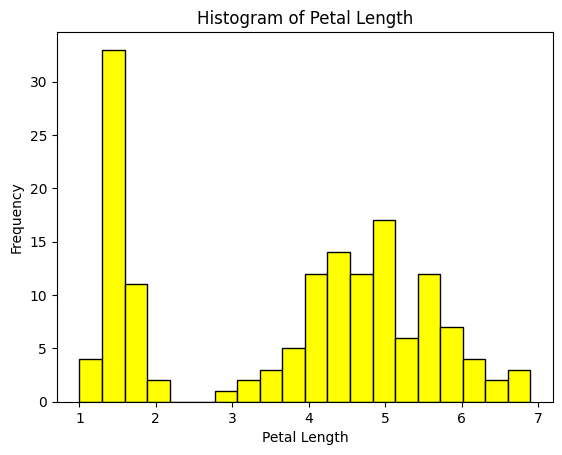

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

plt.hist(iris['petal_length'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

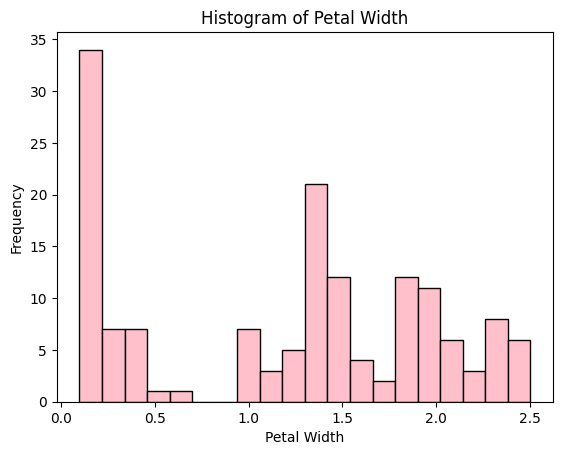

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

plt.hist(iris['petal_width'], bins=20, color='Pink', edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

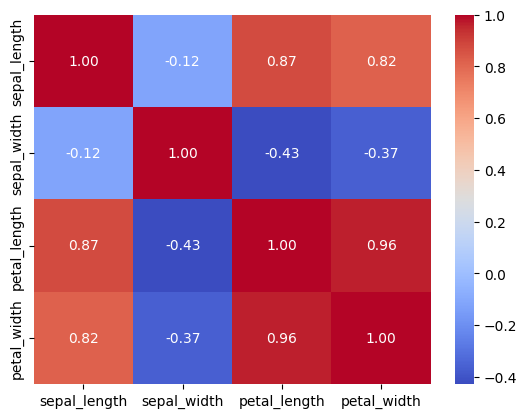

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

numeric_iris = iris.select_dtypes(include=['float64', 'int64'])

corr = numeric_iris.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg, multi_class='ovr')

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Logistic Regression AUC-ROC: {roc_auc_log_reg}")

Logistic Regression Accuracy: 1.0
Logistic Regression AUC-ROC: 1.0


In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest AUC-ROC: {roc_auc_rf}")

Random Forest Accuracy: 1.0
Random Forest AUC-ROC: 1.0


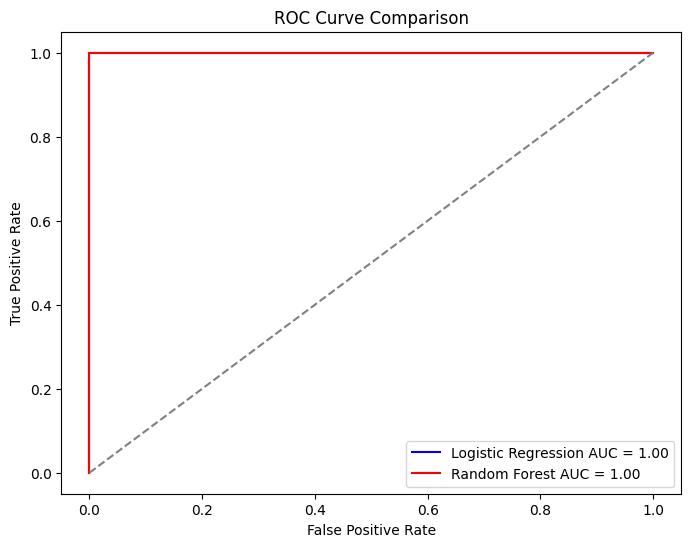

In [26]:
from sklearn.metrics import roc_curve, auc

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1], pos_label=1)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression AUC = %0.2f' % roc_auc_log_reg, color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest AUC = %0.2f' % roc_auc_rf, color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

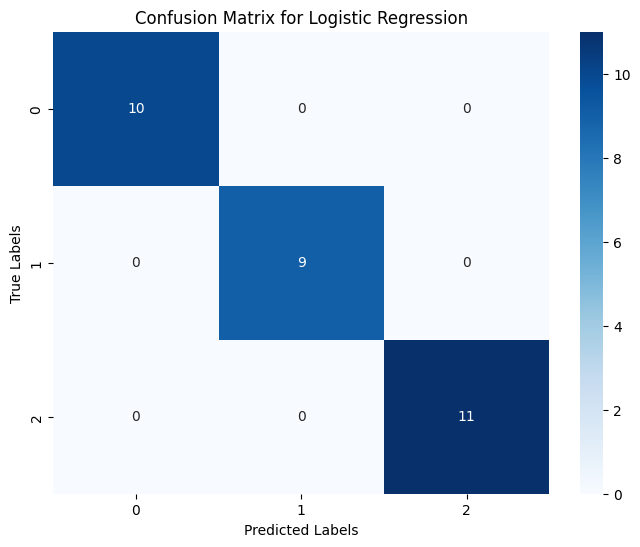

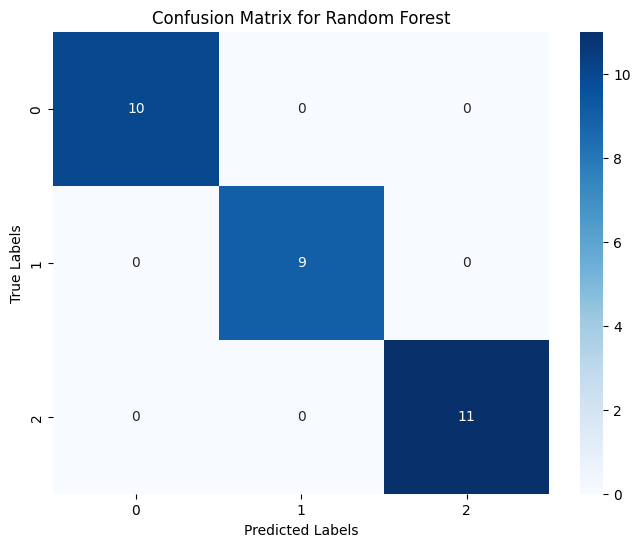

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Random Forest Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_rf.mean():.4f}")




Random Forest Cross-Validation Scores: [0.95833333 0.95833333 0.875      1.         0.95833333]
Mean Cross-Validation Accuracy: 0.9500


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(max_iter=200)

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers
}

# Perform grid search with cross-validation
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the model
grid_search_log_reg.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params_log_reg = grid_search_log_reg.best_params_
best_score_log_reg = grid_search_log_reg.best_score_

# Print results
print(f"Best Parameters: {best_params_log_reg}")
print(f"Best Cross-validation Score: {best_score_log_reg:.4f}")


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-validation Score: 0.9583
